In [14]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [2]:
df = pd.read_excel("lstm101.xls")

In [3]:
df['Day']=df['Month']

In [4]:
import datetime
import calendar

def week_of_month(tgtdate):

    days_this_month = calendar.mdays[tgtdate.month]
    for i in range(1, days_this_month):
        d = datetime.datetime(tgtdate.year, tgtdate.month, i)
        if d.day - d.weekday() > 0:
            startdate = d
            break
    # now we canuse the modulo 7 appraoch
    return (tgtdate - startdate).days //7 + 1

df['week_of_month'] = df['Month'].apply(week_of_month)

In [5]:
df.index=pd.to_datetime(df.Day)

In [6]:
df.head()

,Month,Balance,funds rec,fund remittances,Day,week_of_month
Day,,,,,,
2018-06-01,2018-06-01,162348.74,0,0,2018-06-01,0
2018-06-02,2018-06-02,162331.04,0,0,2018-06-02,0
2018-06-03,2018-06-03,162331.04,0,0,2018-06-03,0
2018-06-04,2018-06-04,96452.04,0,0,2018-06-04,1
2018-06-05,2018-06-05,396452.04,0,0,2018-06-05,1


In [7]:
df=df.drop(columns=['Month','Day'])

In [8]:
df.head()

,Balance,funds rec,fund remittances,week_of_month
Day,,,,
2018-06-01,162348.74,0,0,0
2018-06-02,162331.04,0,0,0
2018-06-03,162331.04,0,0,0
2018-06-04,96452.04,0,0,1
2018-06-05,396452.04,0,0,1


In [9]:
df['day_of_week'] = df.index.dayofweek

In [10]:
df['day_of_month'] = df.index.day

In [11]:
df['month'] = df.index.month

In [12]:
df.head()

,Balance,funds rec,fund remittances,week_of_month,day_of_week,day_of_month,month
Day,,,,,,,
2018-06-01,162348.74,0,0,0,4,1,6
2018-06-02,162331.04,0,0,0,5,2,6
2018-06-03,162331.04,0,0,0,6,3,6
2018-06-04,96452.04,0,0,1,0,4,6
2018-06-05,396452.04,0,0,1,1,5,6


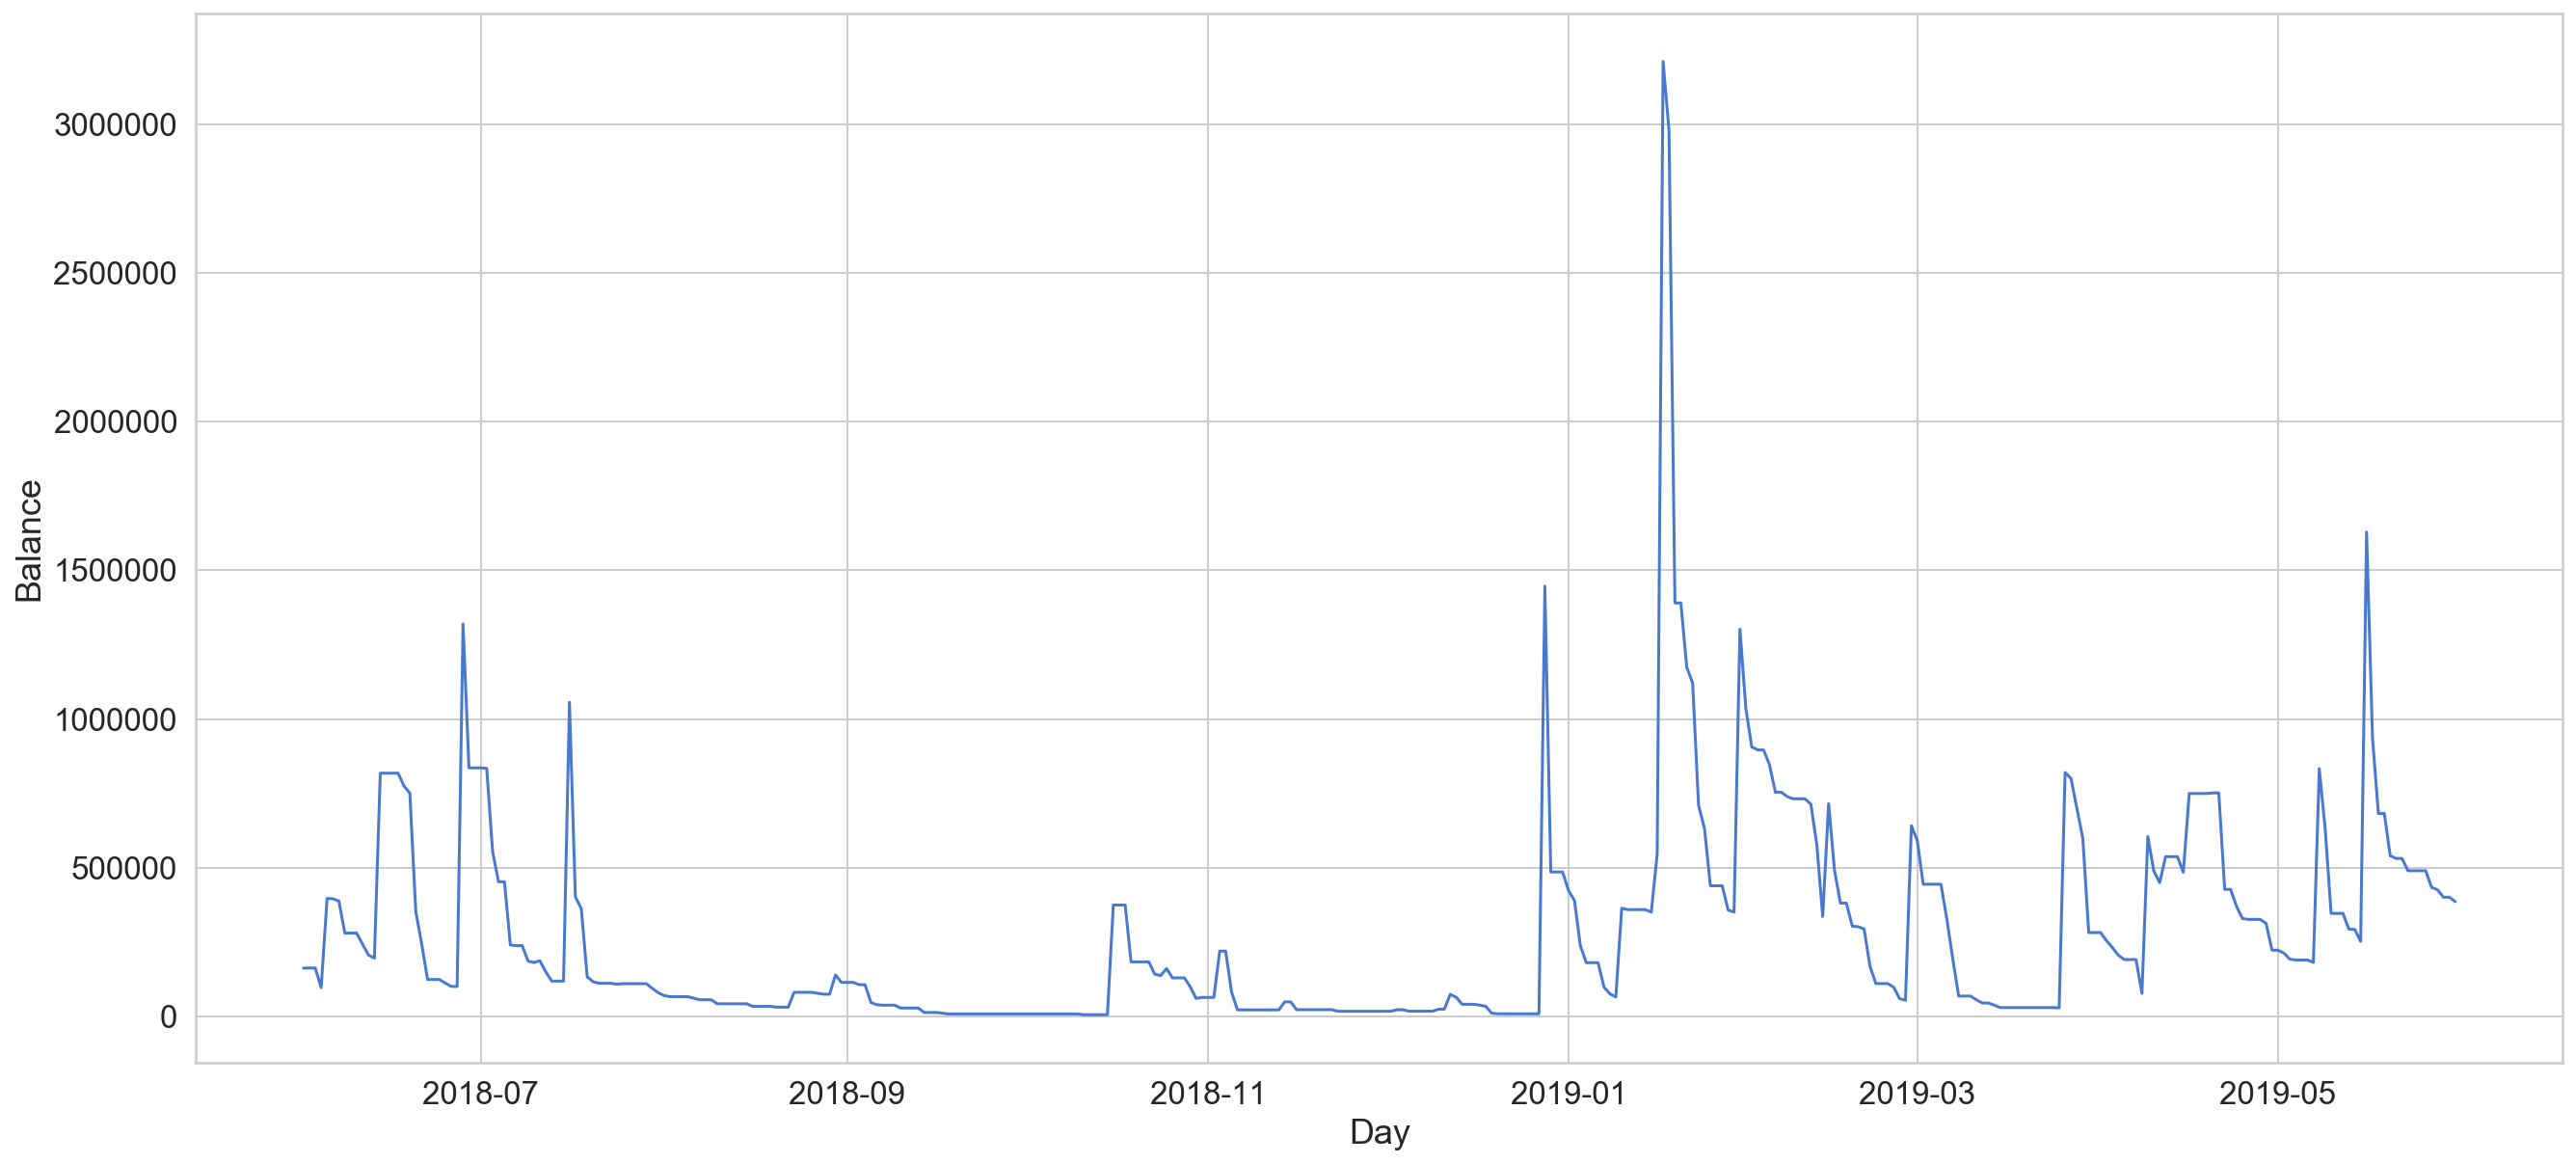

In [16]:
p=sns.lineplot(x=df.index, y="Balance", data=df)
p.figure.savefig("full_data_per_week.png")


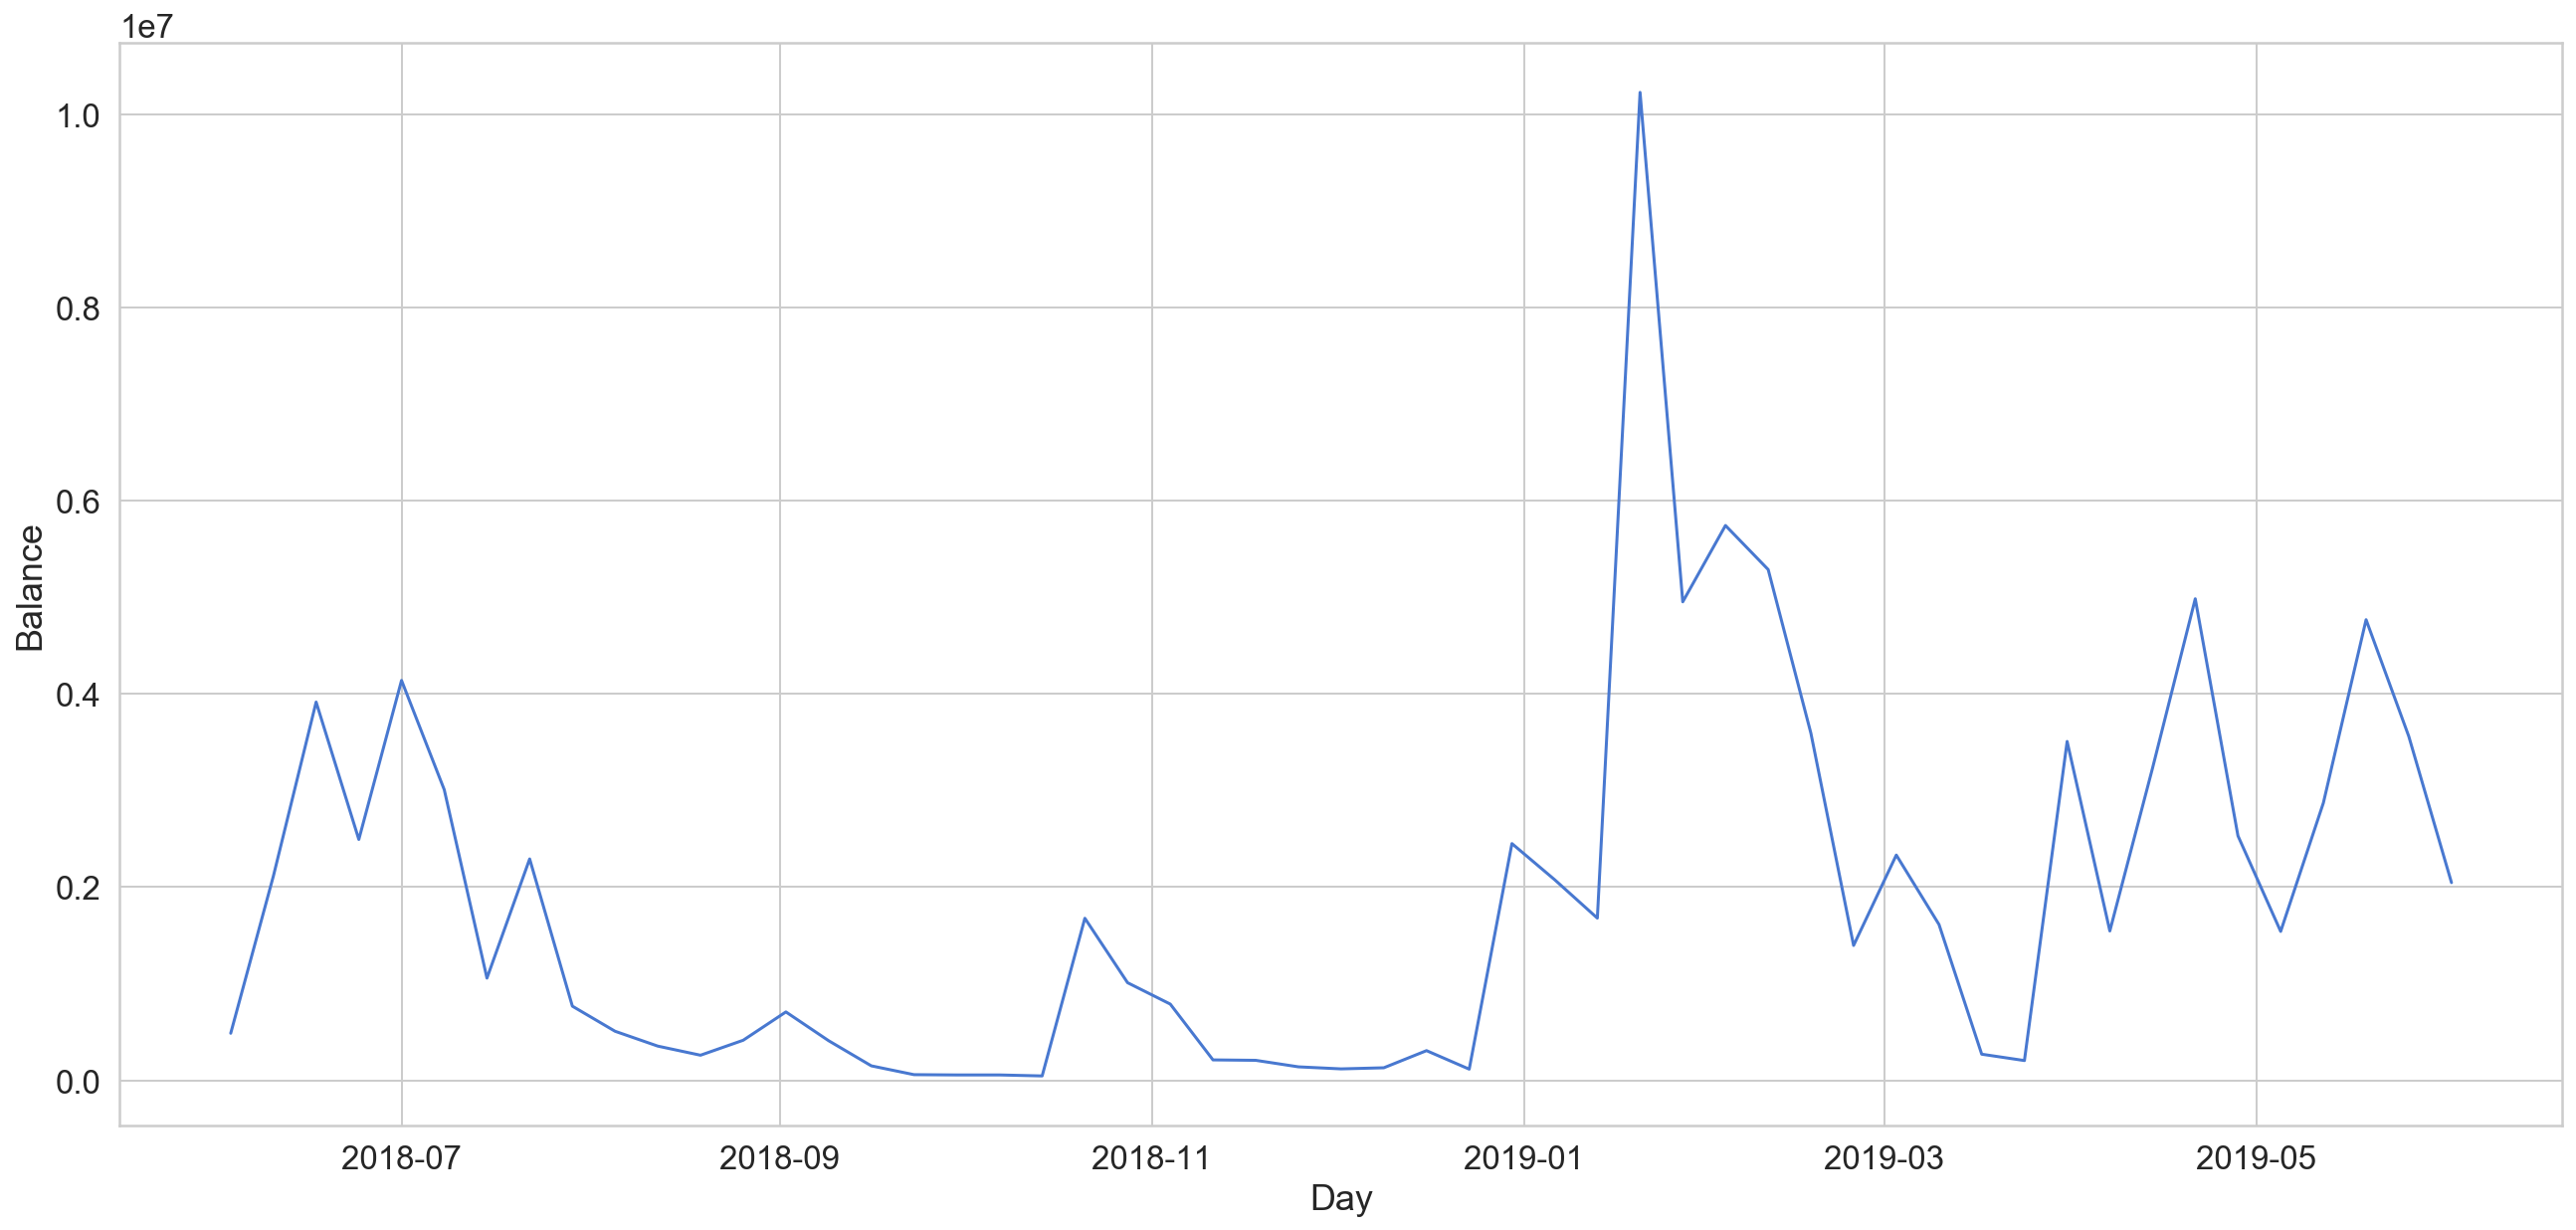

In [29]:
df_by_week = df.resample('W').sum()

sns.lineplot(x=df_by_week.index, y="Balance", data=df_by_week)

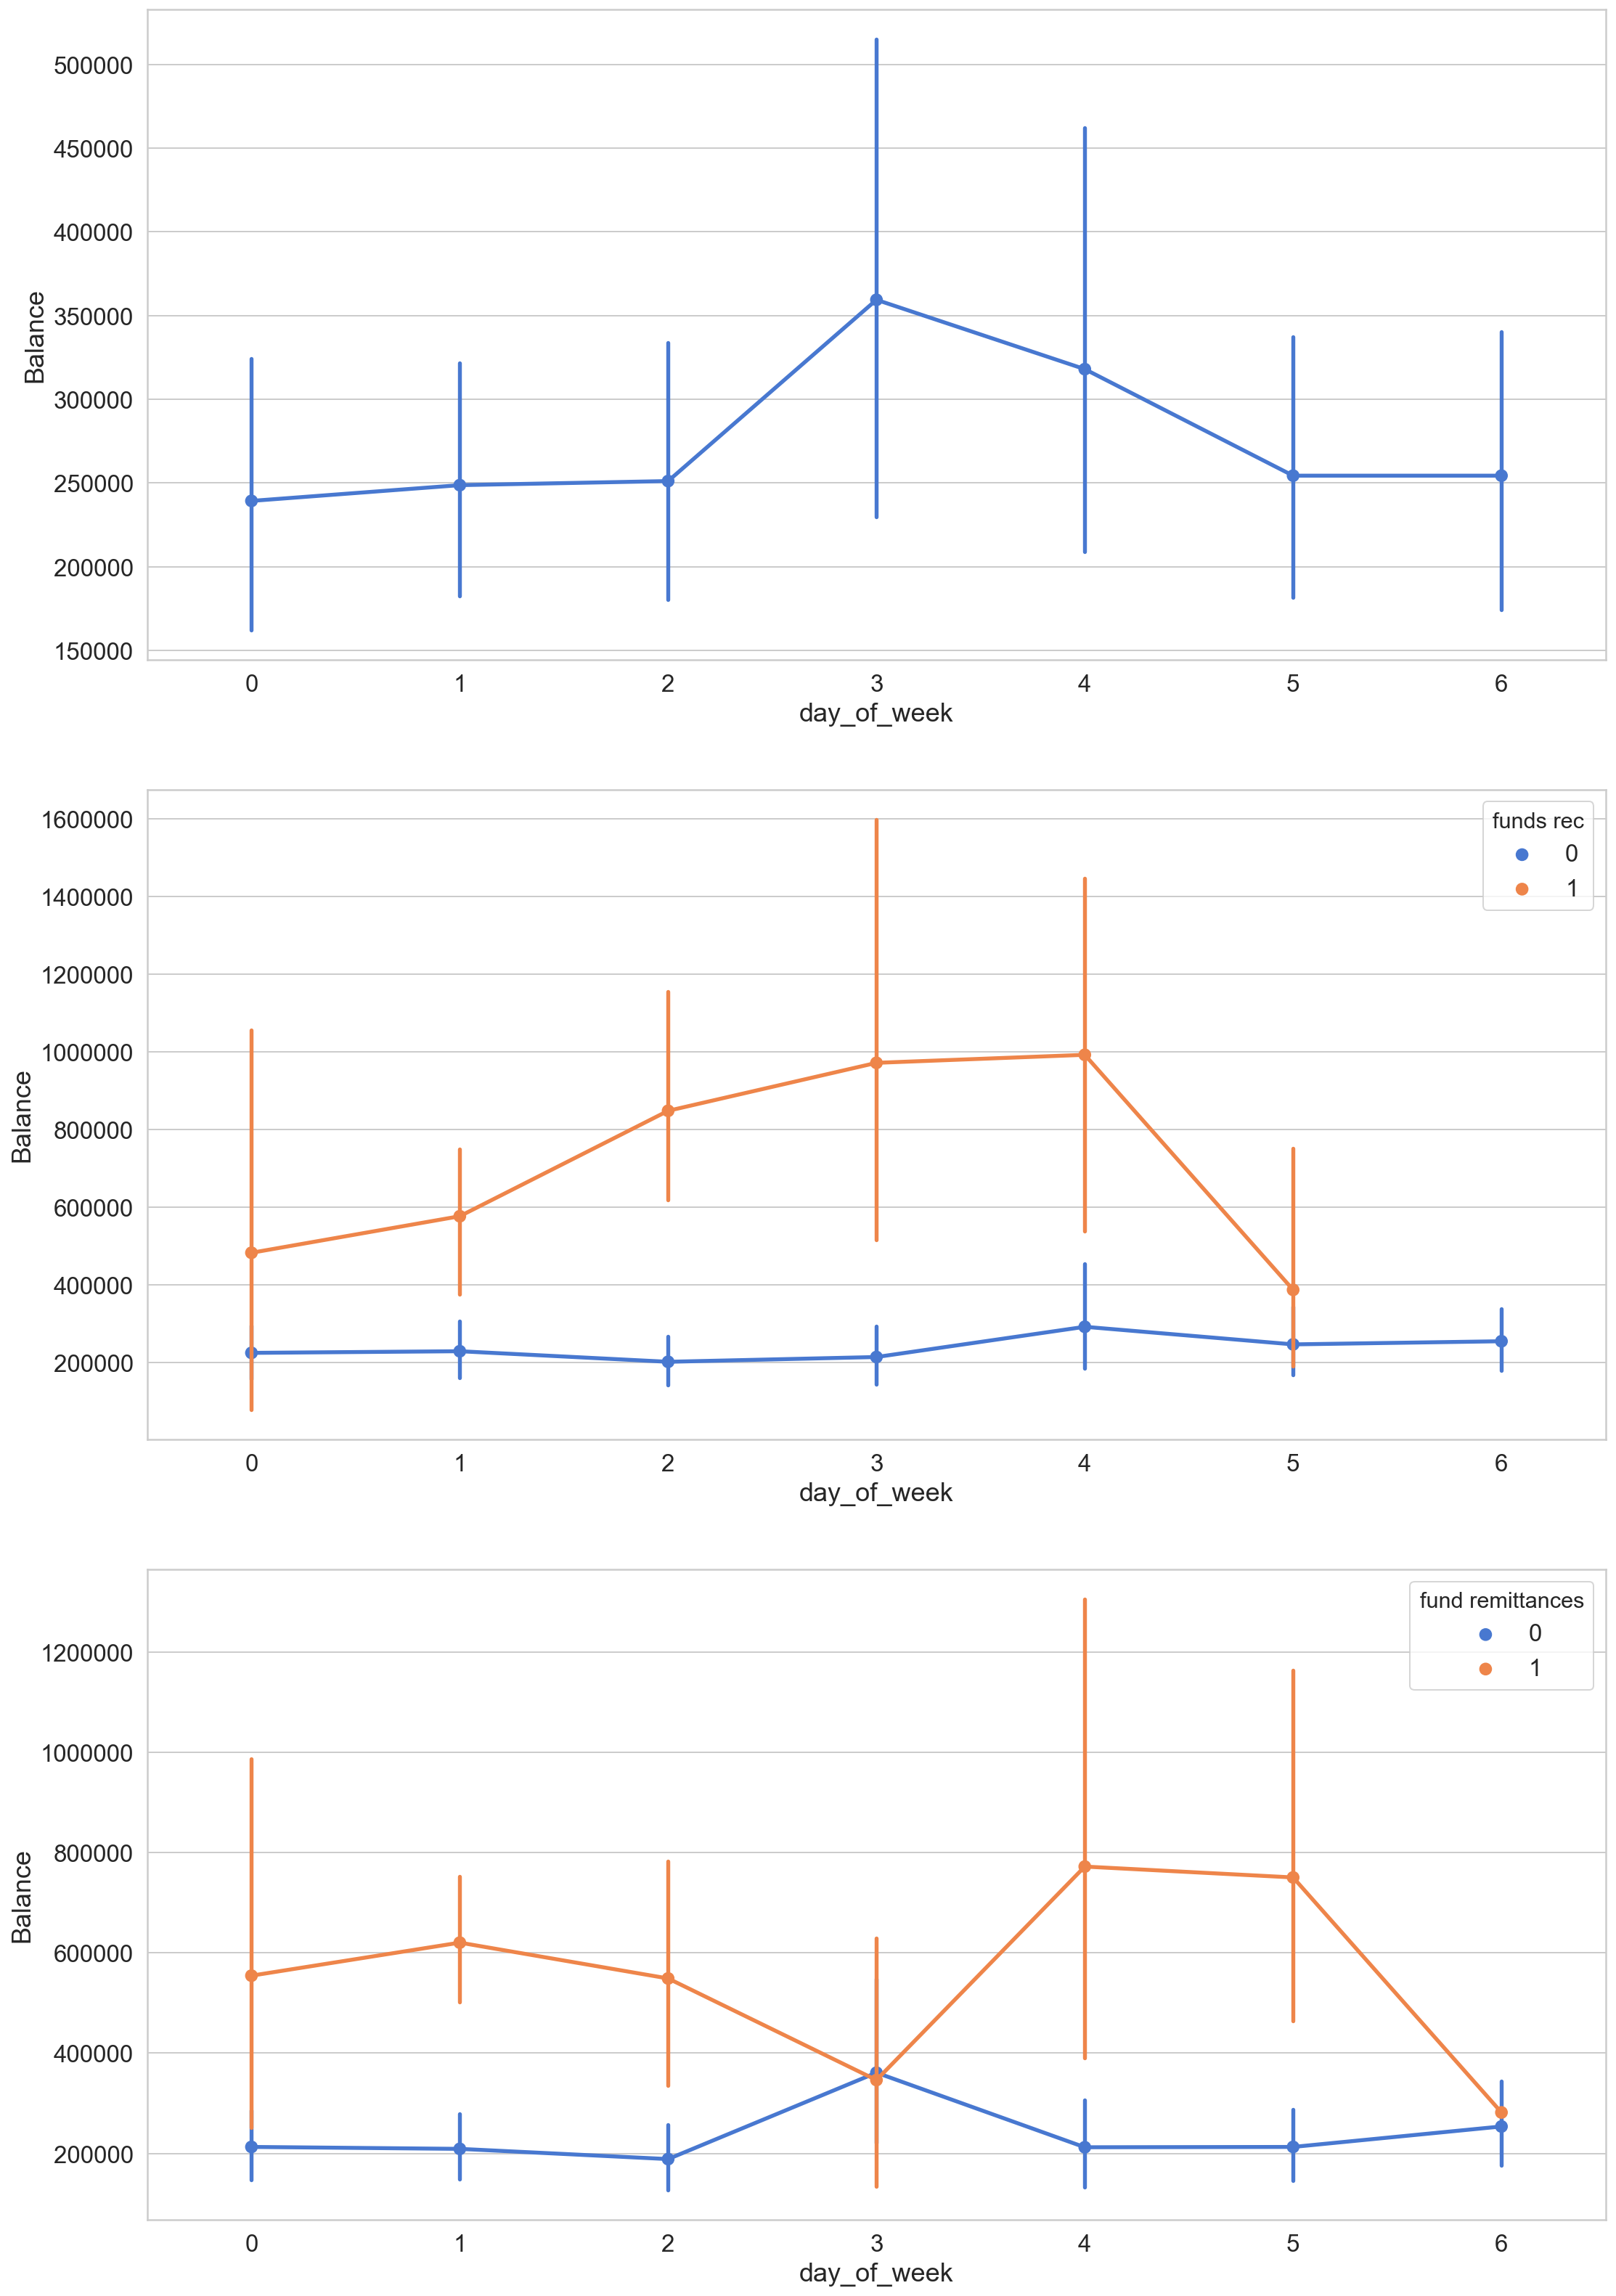

In [17]:
fig,(ax1, ax2, ax3)= plt.subplots(nrows=3)
fig.set_size_inches(18, 28)

p=sns.pointplot(data=df, x='day_of_week', y='Balance',ax=ax1)
p.figure.savefig('day_of_week_vs_Balance')
q=sns.pointplot(data=df, x='day_of_week', y='Balance', hue='funds rec', ax=ax2)
q.figure.savefig('day_of_week_vs_balance_funds_rec')
r=sns.pointplot(data=df, x='day_of_week', y='Balance', hue='fund remittances', ax=ax3)
r.figure.savefig('day_of_week_vs_balance_funds_rem')

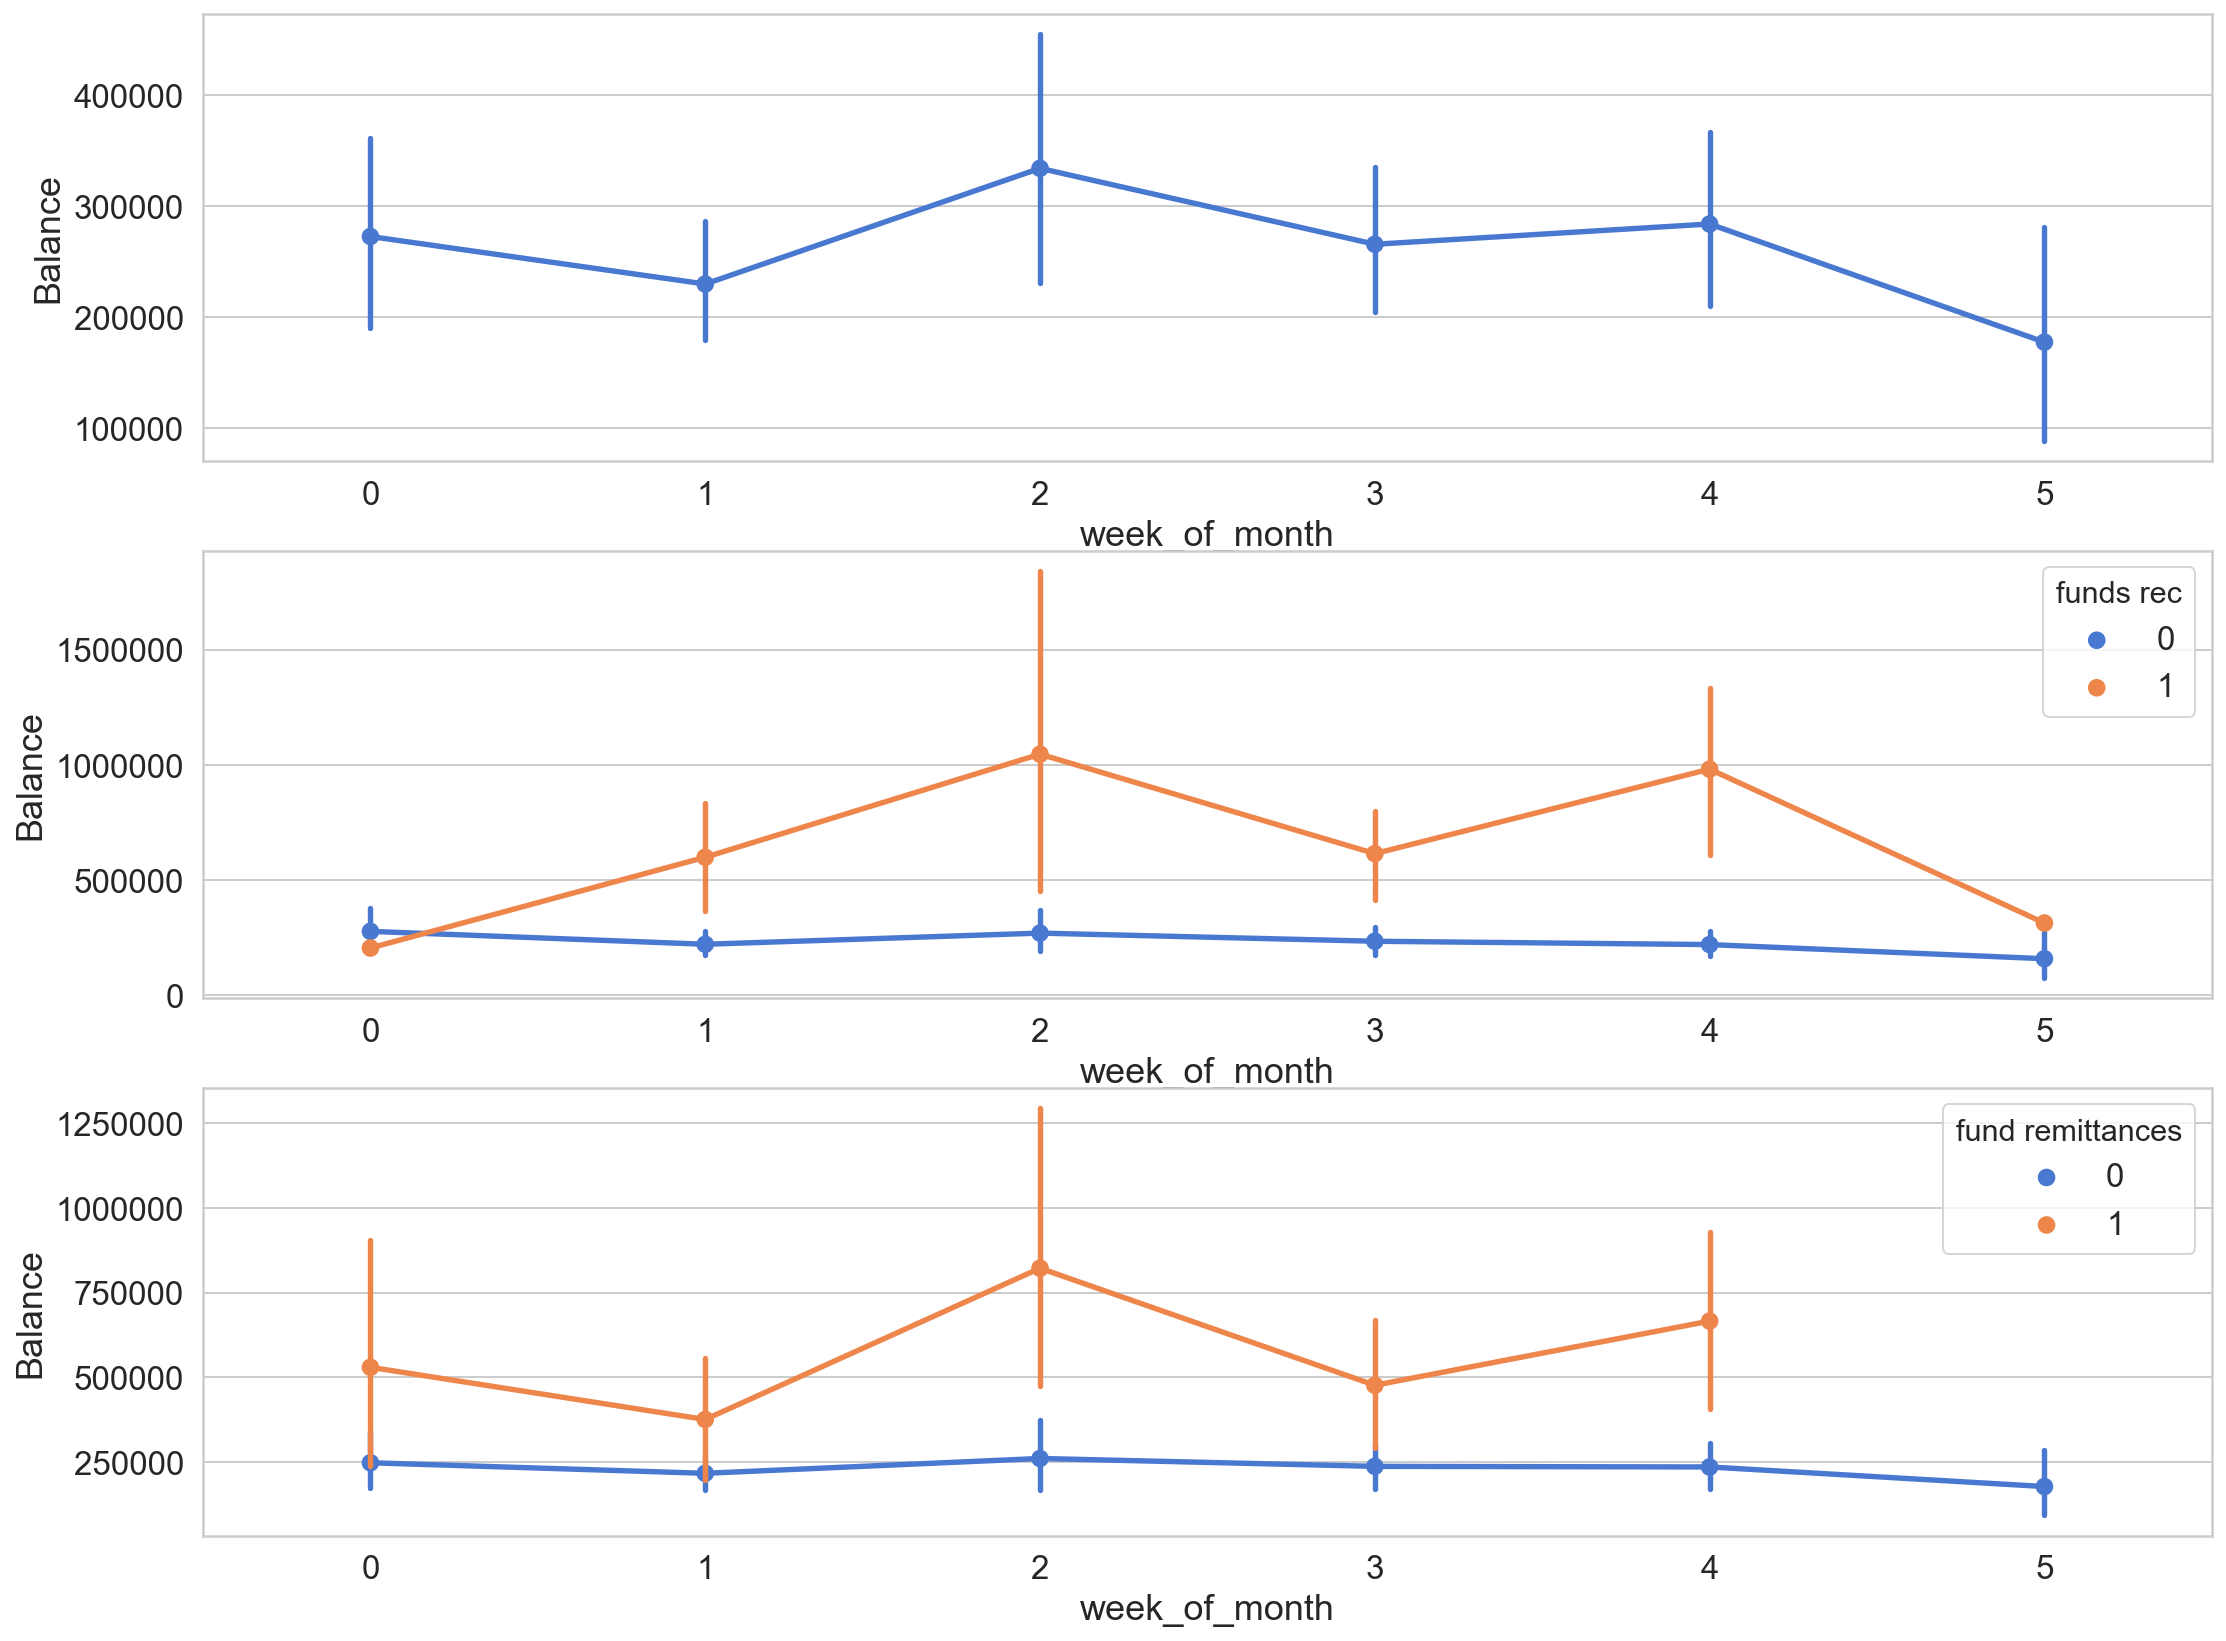

In [18]:
fig,(ax1, ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(18, 14)

p=sns.pointplot(data=df, x='week_of_month', y='Balance', ax=ax1)
p.figure.savefig('week_of_month_vs_balance')
q=sns.pointplot(data=df, x='week_of_month', y='Balance', hue='funds rec', ax=ax2)
q.figure.savefig('week_of_month_vs_balance_funds_rec')
r=sns.pointplot(data=df, x='week_of_month', y='Balance', hue='fund remittances', ax=ax3)
r.figure.savefig('week_of_month_vs_balance_funds_rem')

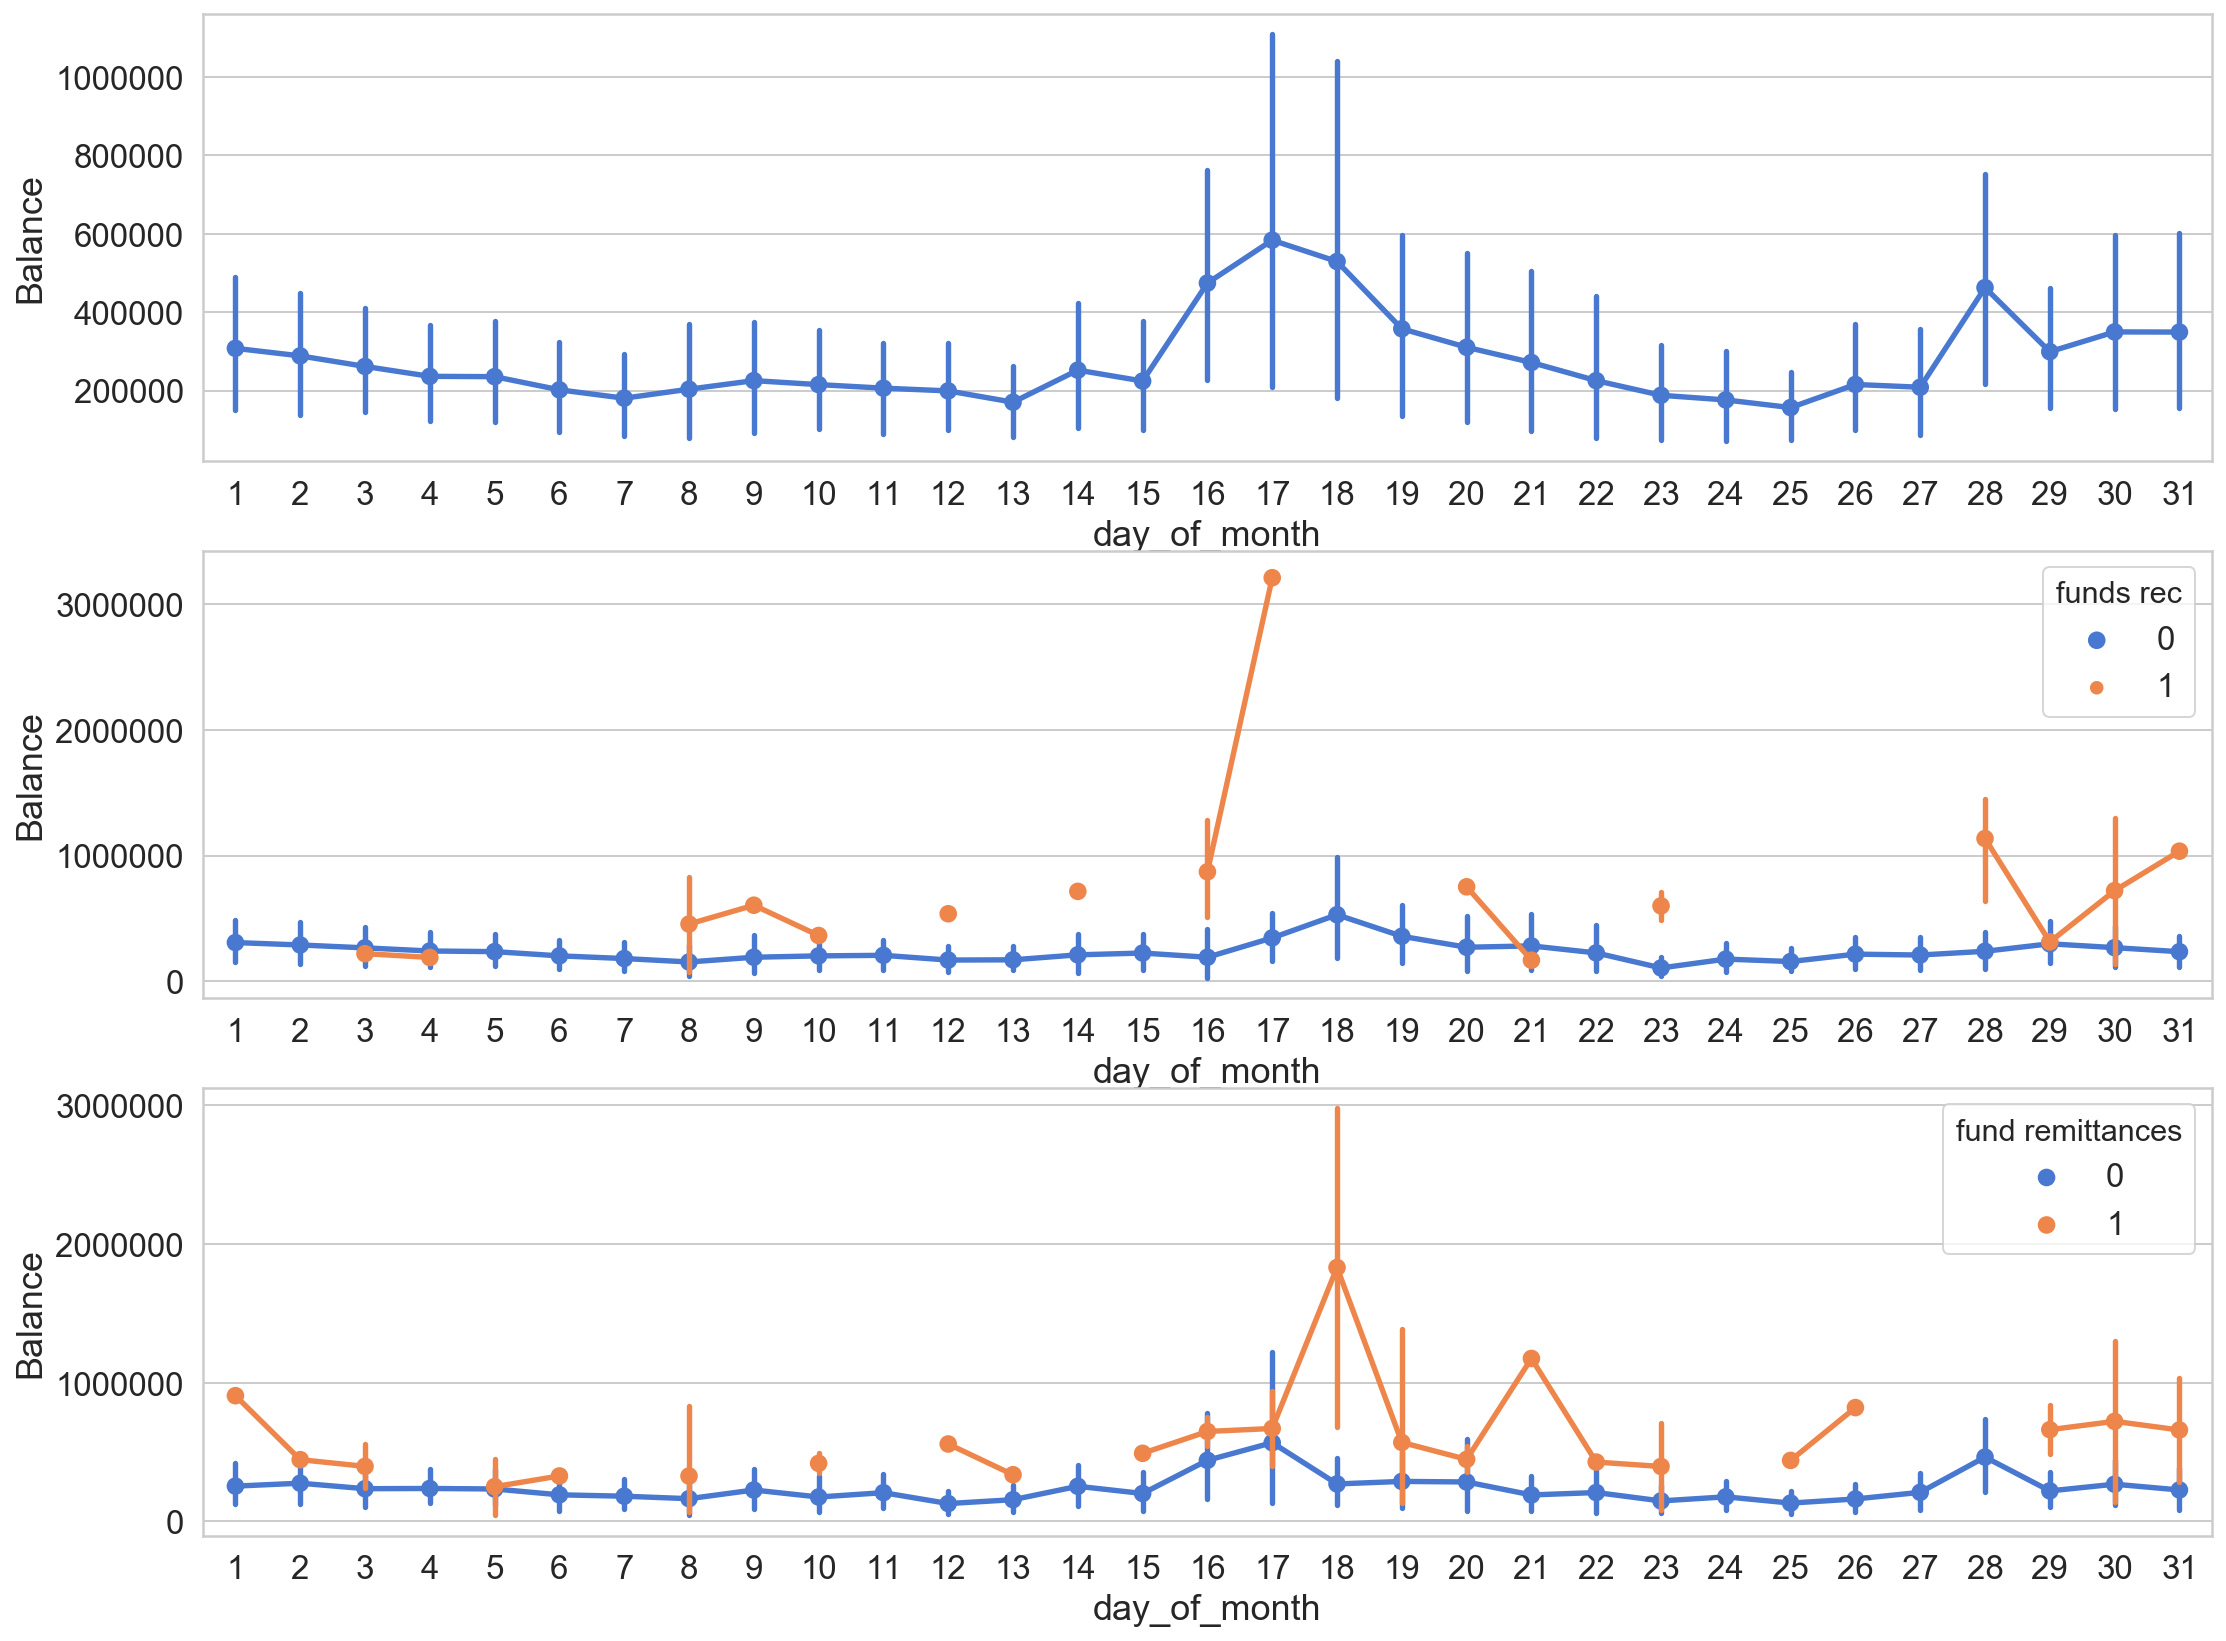

In [20]:
fig,(ax1, ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(18, 14)

p=sns.pointplot(data=df, x='day_of_month', y='Balance', ax=ax1)
p.figure.savefig('day_of_month_vs_balance')
q=sns.pointplot(data=df, x='day_of_month', y='Balance', hue='funds rec', ax=ax2)
q.figure.savefig('day_of_the_month_vs_balance_funds_rec')
r=sns.pointplot(data=df, x='day_of_month', y='Balance', hue='fund remittances', ax=ax3)
r.figure.savefig('day_of_the_month_vs_balacne_funds_rem')

In [21]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

328 37


In [22]:
from sklearn.preprocessing import RobustScaler

f_columns = ['day_of_month', 'funds rec', 'fund remittances','month']

f_transformer = RobustScaler()
cnt_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
cnt_transformer = cnt_transformer.fit(train[['Balance']])

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['Balance'] = cnt_transformer.transform(train[['Balance']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['Balance'] = cnt_transformer.transform(test[['Balance']])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

In [23]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [24]:
time_steps = 10

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.Balance, time_steps)
X_test, y_test = create_dataset(test, test.Balance, time_steps)

print(X_train.shape, y_train.shape)

(318, 10, 7) (318,)


In [25]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=50, 
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [26]:
history = model.fit(
    X_train, y_train, 
    epochs=50, 
    batch_size=32, 
    validation_split=0.1,
    shuffle=False
)

Train on 286 samples, validate on 32 samples
Epoch 1/50
286/286 [==============================] - 12s 42ms/sample - loss: 1.2343 - val_loss: 0.7554
Epoch 2/50
286/286 [==============================] - 0s 847us/sample - loss: 0.9715 - val_loss: 0.5191
Epoch 3/50
286/286 [==============================] - 0s 721us/sample - loss: 0.8500 - val_loss: 0.4729
Epoch 4/50
286/286 [==============================] - 0s 889us/sample - loss: 0.8368 - val_loss: 0.4284
Epoch 5/50
286/286 [==============================] - 0s 791us/sample - loss: 0.7582 - val_loss: 0.4124
Epoch 6/50
286/286 [==============================] - 0s 735us/sample - loss: 0.7372 - val_loss: 0.3989
Epoch 7/50
286/286 [==============================] - 0s 714us/sample - loss: 0.7021 - val_loss: 0.3891
Epoch 8/50
286/286 [==============================] - 0s 721us/sample - loss: 0.6820 - val_loss: 0.3803
Epoch 9/50
286/286 [==============================] - 0s 787us/sample - loss: 0.6788 - val_loss: 0.3743
Epoch 10/50
286/286

In [30]:
y_pred = model.predict(X_test)


In [31]:
y_train_inv = cnt_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = cnt_transformer.inverse_transform(y_pred)


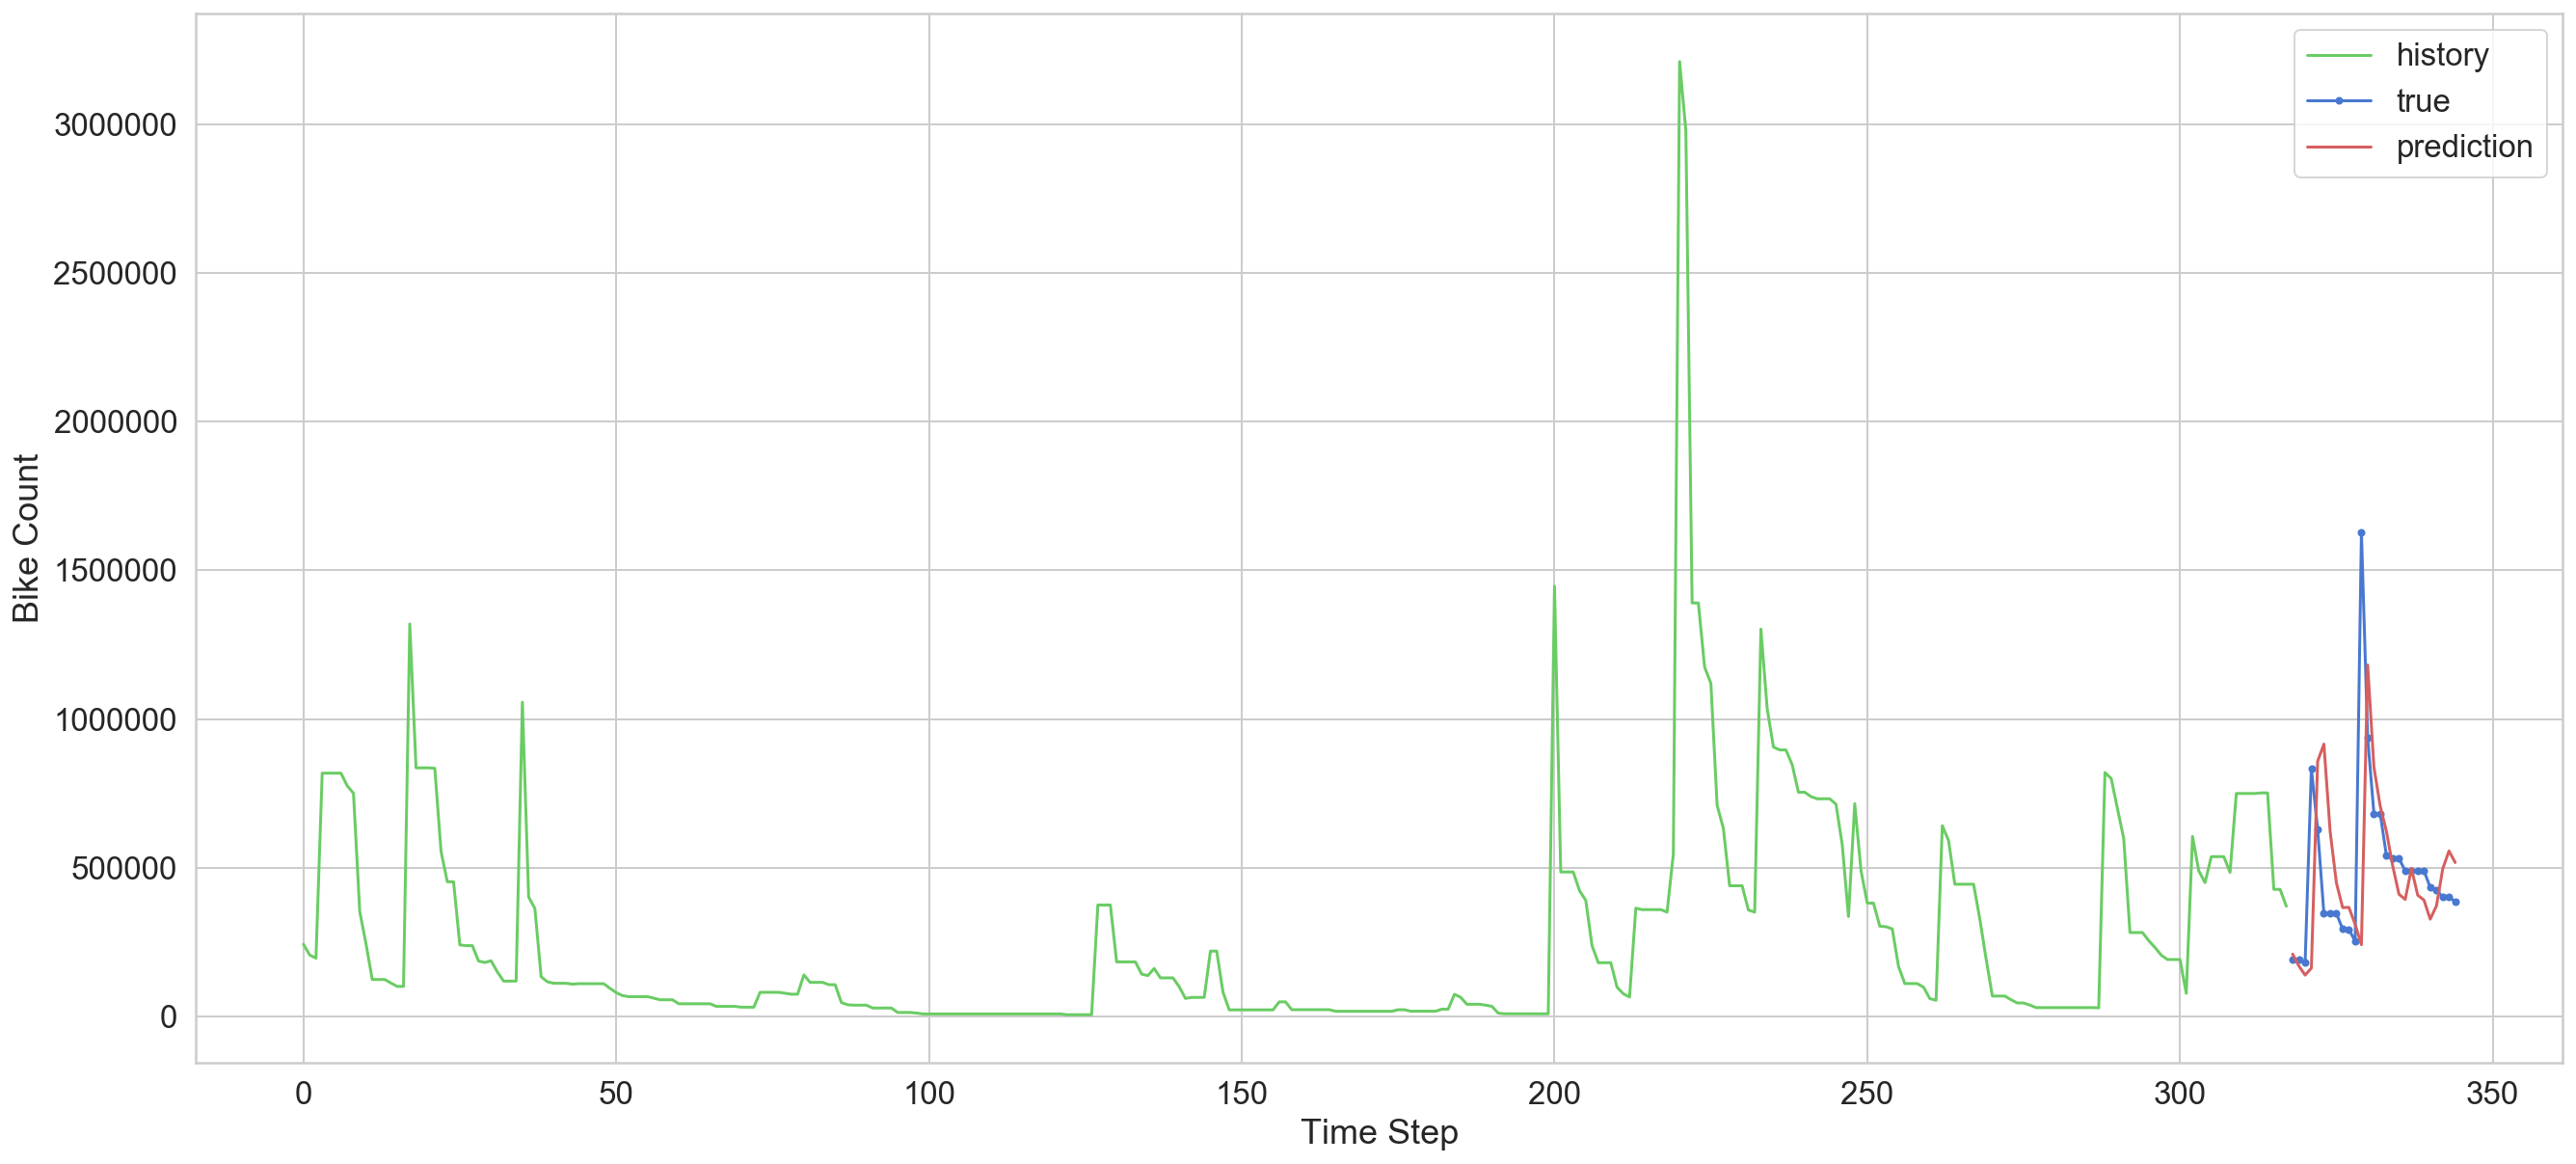

<Figure size 1584x720 with 0 Axes>

In [33]:
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show()
plt.savefig('history_future_ml_prediction');

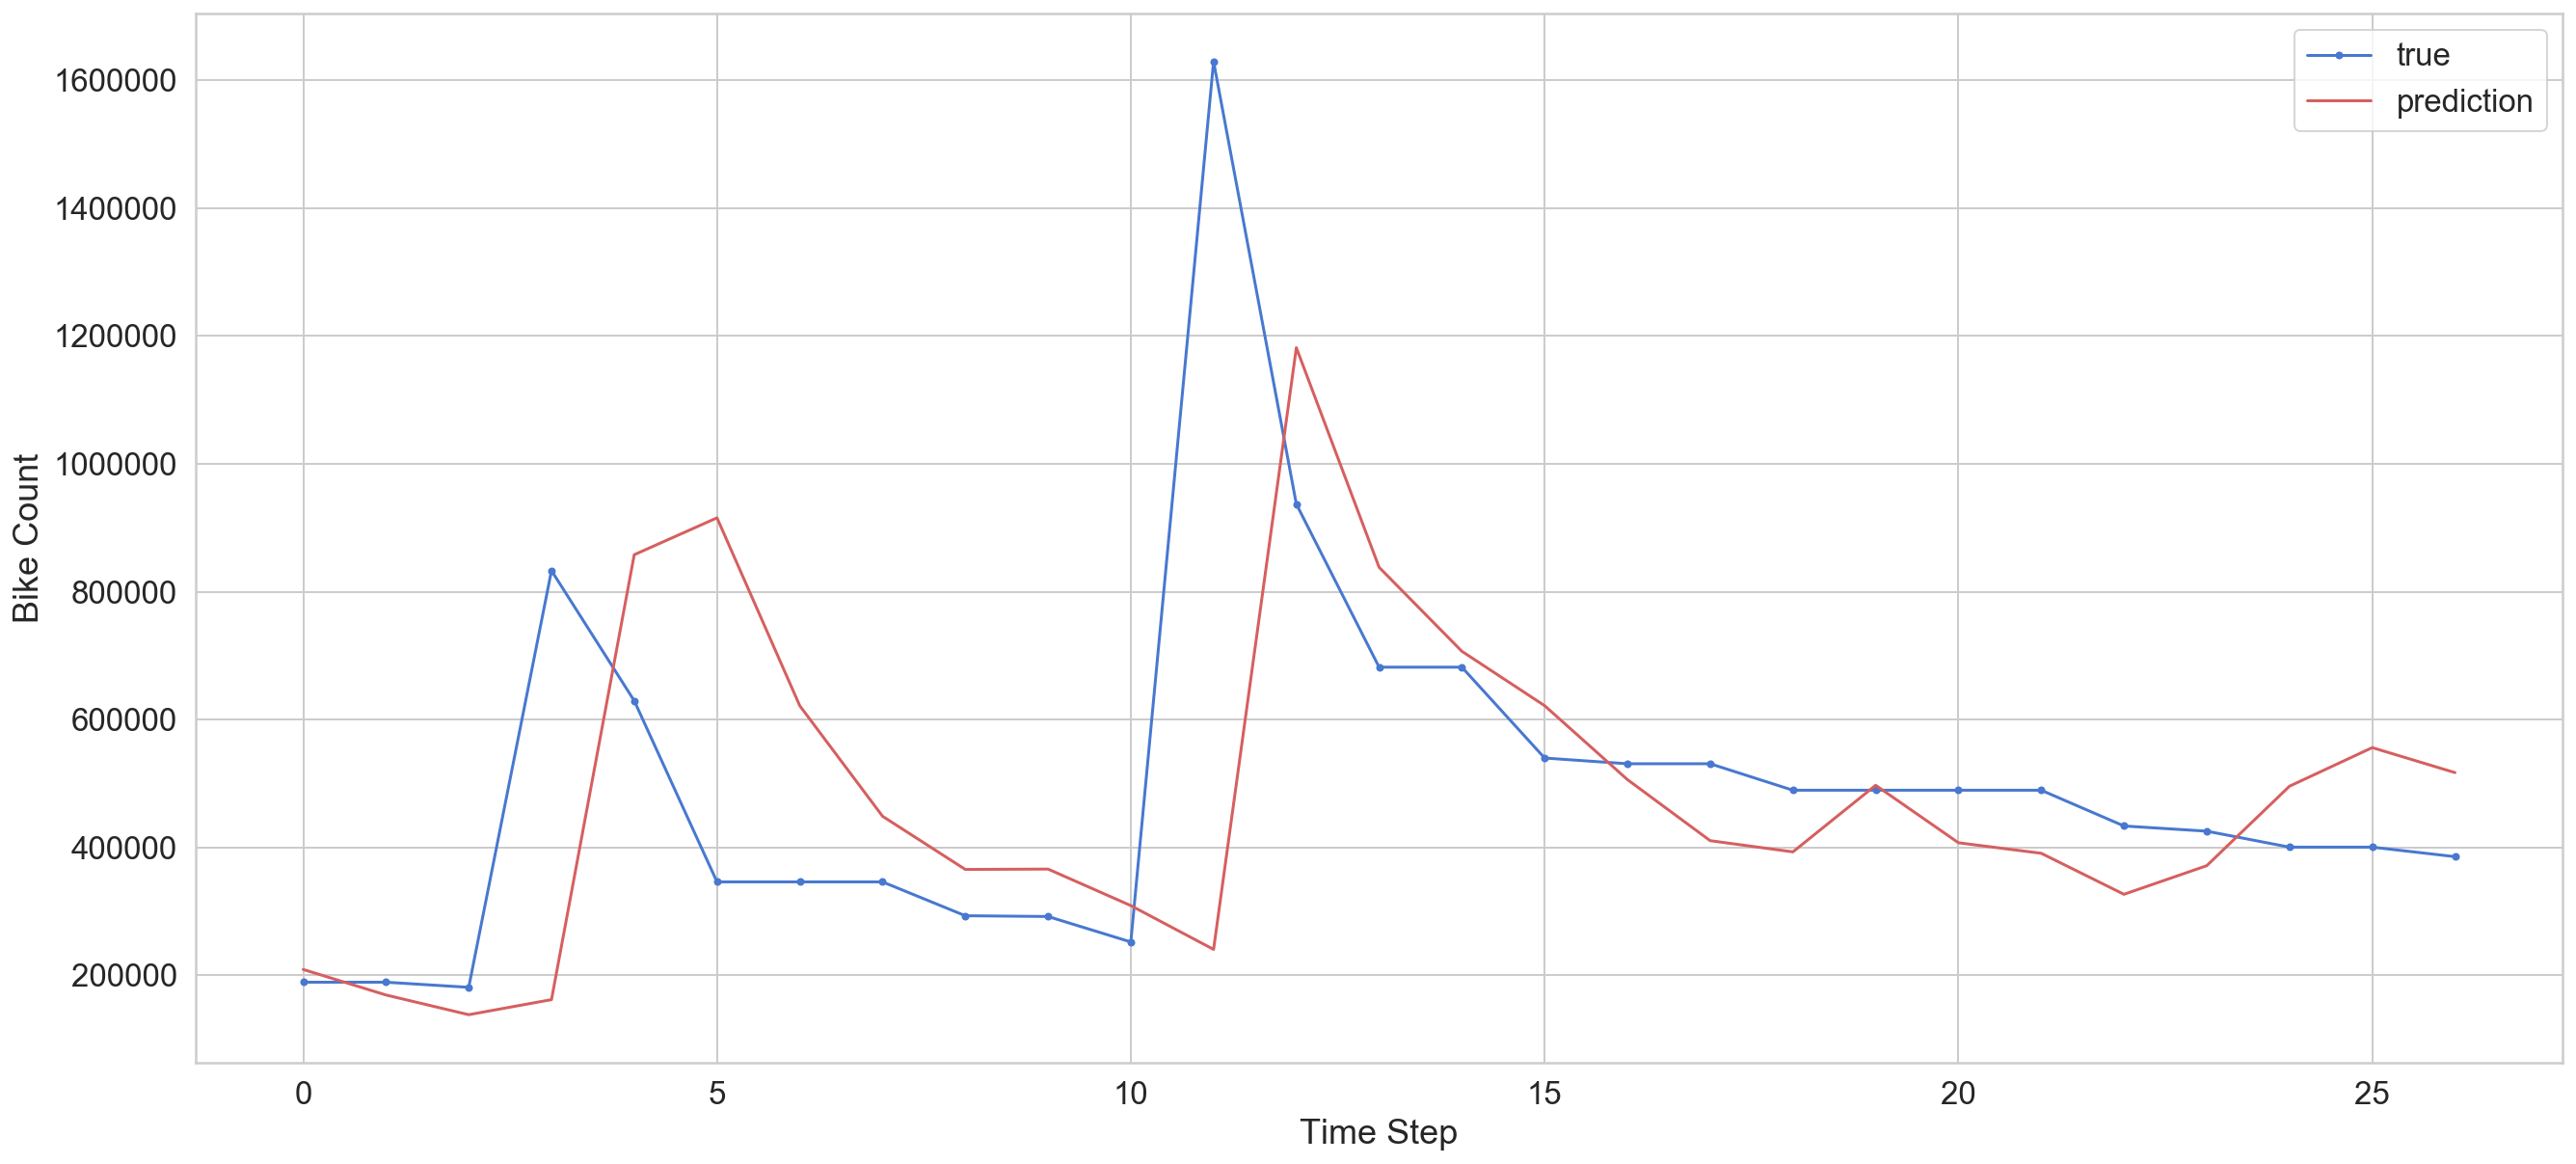

<Figure size 1584x720 with 0 Axes>

In [34]:
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show()
plt.savefig('magnified_prediction');